In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
train_data.isnull().sum(), test_data.isnull().sum()

(CustomerId         0
 Surname            0
 CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember     0
 EstimatedSalary    0
 Exited             0
 dtype: int64,
 CustomerId         0
 Surname            0
 CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember     0
 EstimatedSalary    0
 dtype: int64)

In [4]:
test_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15642544,Henderson,723,France,Male,34,5,0.00,2,0,1,12092.03
1,15779492,Trevisano,796,Spain,Male,56,6,94231.13,1,0,0,121164.60
2,15815271,Ritchie,755,Germany,Male,43,6,165048.50,3,1,0,16929.41
3,15582591,Chiabuotu,615,Spain,Male,59,4,155766.05,1,1,1,110275.17
4,15595937,Bruno,430,Germany,Male,36,1,138992.48,2,0,0,122373.42
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15678727,Tan,770,Germany,Male,45,4,110765.68,1,1,0,26163.74
2996,15793491,Cherkasova,714,Germany,Male,26,3,119545.48,2,1,0,65482.94
2997,15575243,Gorbunova,764,France,Female,39,1,129068.54,2,1,1,187905.12
2998,15803136,Postle,416,Germany,Female,41,10,122189.66,2,1,0,98301.61


In [5]:
train_data["NewAge"] = pd.qcut(train_data['Age'], 5)
test_data["NewAge"] = pd.qcut(test_data["Age"], 5)
train_data["NewAGT"] = train_data["Age"] - train_data["Tenure"]
train_data["CreditsScore"] = pd.qcut(train_data['CreditScore'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
train_data["AgeScore"] = pd.qcut(train_data['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
train_data["BalanceScore"] = pd.qcut(train_data['Balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
train_data["EstSalaryScore"] = pd.qcut(train_data['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
train_data["NewEstimatedSalary"] = train_data["EstimatedSalary"] / 12 

test_data["NewAge"] = pd.qcut(test_data['Age'], 5)
test_data["NewAge"] = pd.qcut(test_data["Age"], 5)
test_data["NewAGT"] = test_data["Age"] - test_data["Tenure"]
test_data["CreditsScore"] = pd.qcut(test_data['CreditScore'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
test_data["AgeScore"] = pd.qcut(test_data['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
test_data["BalanceScore"] = pd.qcut(test_data['Balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
test_data["EstSalaryScore"] = pd.qcut(test_data['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
test_data["NewEstimatedSalary"] = test_data["EstimatedSalary"] / 12 

In [6]:
train_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewAge,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
0,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0,"(39.0, 46.0]",40,4,6,1,9,13383.921667
1,15574523,Cheng,576,France,Male,39,1,0.00,2,1,1,68814.23,0,"(35.0, 39.0]",38,3,5,1,4,5734.519167
2,15587443,Akudinobi,728,France,Female,69,1,0.00,2,1,1,131804.86,0,"(46.0, 92.0]",68,8,8,1,7,10983.738333
3,15768682,Amies,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0,"(35.0, 39.0]",36,5,5,1,6,8833.104167
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1,"(35.0, 39.0]",28,9,4,6,3,3482.354167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,15628999,Townsend,732,France,Male,79,10,61811.23,1,1,1,104222.80,0,"(46.0, 92.0]",69,8,8,4,6,8685.233333
6996,15661708,She,508,France,Female,41,5,0.00,2,1,1,94170.84,0,"(39.0, 46.0]",36,1,6,4,5,7847.570000
6997,15593900,Belousov,705,France,Male,38,1,189443.72,1,0,1,106648.58,0,"(35.0, 39.0]",37,8,5,10,6,8887.381667
6998,15570087,Parry-Okeden,664,France,Female,44,8,142989.69,1,1,1,115452.51,1,"(39.0, 46.0]",36,6,6,9,6,9621.042500


## One Hot Encoding

In [7]:
test_data = pd.get_dummies(test_data, columns =["Geography", "Gender"], drop_first = True)
train_data = pd.get_dummies(train_data, columns =["Geography", "Gender"], drop_first = True)



In [8]:
train_data = train_data.drop(["Surname", "NewAge", "CustomerId"], axis = 1)
test_data2 = test_data.drop(["Surname", "NewAge", "CustomerId"], axis = 1)

In [9]:
category_df_train = train_data[["Geography_Germany", "Geography_Spain", "Gender_Male", "HasCrCard","IsActiveMember"]]
category_df_test = test_data2[["Geography_Germany", "Geography_Spain", "Gender_Male", "HasCrCard","IsActiveMember"]]
category_df_train.head()


,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard,IsActiveMember
0,0,0,0,0,1
1,0,0,1,1,1
2,0,0,0,1,1
3,0,1,1,1,1
4,1,0,1,1,0


In [10]:
y_train = train_data["Exited"]
x_train = train_data.drop(["Exited", "Geography_Germany", "Geography_Spain", "Gender_Male", "HasCrCard","IsActiveMember"], axis=1)
x_test = test_data2.drop(["Geography_Germany", "Geography_Spain", "Gender_Male", "HasCrCard","IsActiveMember"], axis=1)
cols = x_train.columns
index = x_train.index


x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
0,601,41,1,0.00,2,160607.06,40,4,6,1,9,13383.921667
1,576,39,1,0.00,2,68814.23,38,3,5,1,4,5734.519167
2,728,69,1,0.00,2,131804.86,68,8,8,1,7,10983.738333
3,640,39,3,0.00,1,105997.25,36,5,5,1,6,8833.104167
4,768,37,9,108308.11,1,41788.25,28,9,4,6,3,3482.354167


In [11]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(x_train)
x_train = transformer.transform(x_train)
x_train = pd.DataFrame(x_train, columns = cols, index = index)

In [12]:
x_train = pd.concat([x_train,category_df_train], axis = 1)
x_test = pd.concat([x_test,category_df_train], axis=1)

In [13]:
x_test.shape


(7000, 17)

In [15]:
'''train_data[["Geography"]] = train_data[["Geography"]].apply(le.fit_transform)
train_data[["Gender"]] = train_data[["Gender"]].apply(le.fit_transform)
test_data[["Geography"]] = test_data[["Geography"]].apply(le.fit_transform)
test_data[["Gender"]] = test_data[["Gender"]].apply(le.fit_transform)

train_data.head()'''

'train_data[["Geography"]] = train_data[["Geography"]].apply(le.fit_transform)\ntrain_data[["Gender"]] = train_data[["Gender"]].apply(le.fit_transform)\ntest_data[["Geography"]] = test_data[["Geography"]].apply(le.fit_transform)\ntest_data[["Gender"]] = test_data[["Gender"]].apply(le.fit_transform)\n\ntrain_data.head()'

# Feature Selection

In [16]:
x_train.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard,IsActiveMember
CreditScore,1.000000,-0.002511,-0.006013,0.002181,0.008048,-0.007756,-0.000820,0.977489,-0.006337,-0.000728,-0.007964,-0.007756,-0.002036,-0.003275,-0.006991,-0.008505,0.026724
Age,-0.002511,1.000000,0.001982,0.019424,-0.030046,0.009270,0.963859,-0.001578,0.923845,0.015557,0.010568,0.009270,0.042065,-0.011747,-0.024932,-0.014927,0.085195
Tenure,-0.006013,0.001982,1.000000,0.001221,-0.003052,0.007210,-0.264501,-0.005226,-0.001839,0.000026,0.004773,0.007210,-0.001857,0.003546,0.011091,0.025304,-0.025239
Balance,0.002181,0.019424,0.001221,1.000000,-0.303379,0.018277,0.018407,0.003715,0.032178,0.954107,0.017977,0.018277,0.396268,-0.131095,0.007610,-0.009317,-0.010813
NumOfProducts,0.008048,-0.030046,-0.003052,-0.303379,1.000000,0.015463,-0.028163,0.006991,-0.033252,-0.271413,0.015759,0.015463,-0.003328,0.003895,-0.012755,0.009249,0.008045
EstimatedSalary,-0.007756,0.009270,0.007210,0.018277,0.015463,1.000000,0.007019,-0.000457,0.012861,0.024454,0.994815,1.000000,0.017206,-0.011224,-0.003190,-0.010966,-0.018574
NewAGT,-0.000820,0.963859,-0.264501,0.018407,-0.028163,0.007019,1.000000,-0.000130,0.891435,0.014996,0.008920,0.007019,0.041061,-0.012273,-0.026999,-0.021137,0.088885
CreditsScore,0.977489,-0.001578,-0.005226,0.003715,0.006991,-0.000457,-0.000130,1.000000,-0.005804,0.001386,-0.000918,-0.000457,-0.001140,-0.004996,-0.003808,-0.005331,0.027252
AgeScore,-0.006337,0.923845,-0.001839,0.032178,-0.033252,0.012861,0.891435,-0.005804,1.000000,0.027672,0.013673,0.012861,0.057046,-0.007506,-0.025943,-0.018131,0.038327
BalanceScore,-0.000728,0.015557,0.000026,0.954107,-0.271413,0.024454,0.014996,0.001386,0.027672,1.000000,0.023810,0.024454,0.355560,-0.116237,0.008446,-0.006955,-0.012589


In [17]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

<AxesSubplot:>

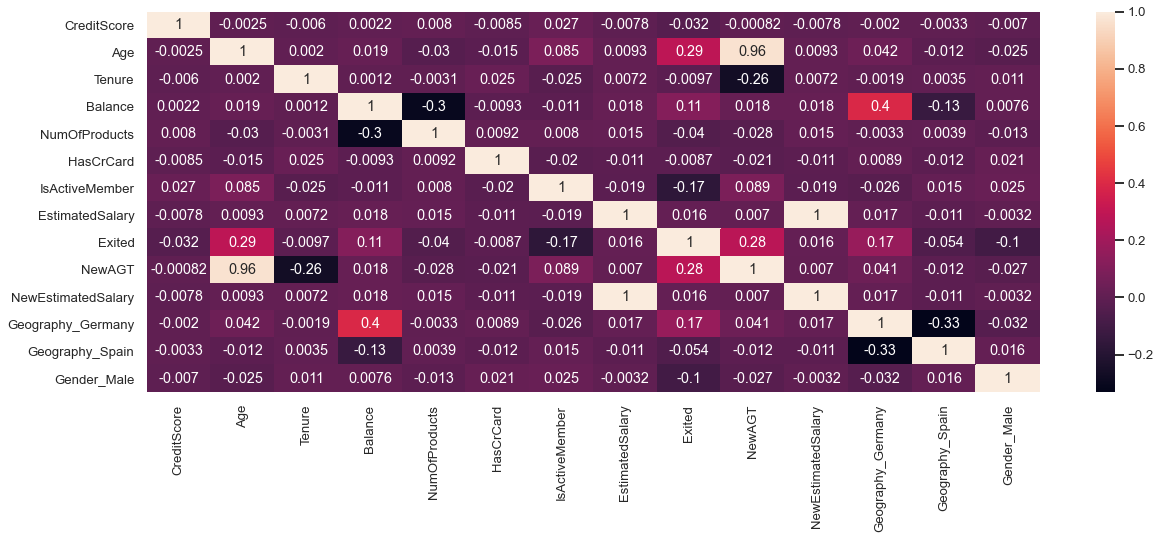

In [18]:
sns.heatmap(train_data.corr(), annot= True )

In [19]:
correlation = train_data.corr()['Exited'].sort_values()
print('Highest correlation: \n', correlation.tail(6))
print('Lowest correlation: \n', correlation.head(6))

Highest correlation: 
 EstimatedSalary      0.016426
Balance              0.111493
Geography_Germany    0.170520
NewAGT               0.281025
Age                  0.288732
Exited               1.000000
Name: Exited, dtype: float64
Lowest correlation: 
 IsActiveMember    -0.167725
Gender_Male       -0.101712
Geography_Spain   -0.054422
NumOfProducts     -0.040043
CreditScore       -0.032201
Tenure            -0.009668
Name: Exited, dtype: float64


In [20]:
'''x_train = train_data[["EstimatedSalary","Geography","Balance", "Age"]].values
y_train = train_data['Exited'].values
x_test = test_data[["EstimatedSalary","Geography","Balance", "Age"]].values
#y_test = test_data["Exited"].values
'''
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard,IsActiveMember
0,-0.373134,0.333333,-1.00,-0.762289,1.0,0.619383,0.666667,-0.2,0.50,-0.9,0.7,0.619383,0,0,0,0,1
1,-0.559701,0.166667,-1.00,-0.762289,1.0,-0.312473,0.500000,-0.4,0.25,-0.9,-0.3,-0.312473,0,0,1,1,1
2,0.574627,2.666667,-1.00,-0.762289,1.0,0.326991,3.000000,0.6,1.00,-0.9,0.3,0.326991,0,0,0,1,1
3,-0.082090,0.166667,-0.50,-0.762289,0.0,0.064999,0.333333,0.0,0.25,-0.9,0.1,0.064999,0,1,1,1,1
4,0.873134,0.000000,1.00,0.084248,0.0,-0.586833,-0.333333,0.8,0.00,0.1,-0.5,-0.586833,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.604478,3.500000,1.25,-0.279172,0.0,0.046985,3.083333,0.6,1.00,-0.3,0.1,0.046985,0,0,1,1,1
6996,-1.067164,0.333333,0.00,-0.762289,1.0,-0.055059,0.333333,-0.8,0.50,-0.3,-0.1,-0.055059,0,0,0,1,1
6997,0.402985,0.083333,-1.00,0.718405,0.0,0.071611,0.416667,0.6,0.25,0.9,0.1,0.071611,0,0,1,0,1
6998,0.097015,0.583333,0.75,0.355320,0.0,0.160986,0.333333,0.2,0.50,0.7,0.1,0.160986,0,0,0,1,1


In [21]:
'''x_train = x_train[["CreditScore","Age", "Gender_Male",'BalanceScore', 'Tenure', 'AgeScore', "Geography_Germany","Geography_Spain","NewAGT",'EstimatedSalary', "Balance", "NumOfProducts","IsActiveMember", "EstSalaryScore"]].values
y_train = train_data['Exited'].values
x_test = test_data[["CreditScore","Age", "Gender_Male",'BalanceScore', 'Tenure', 'AgeScore', "Geography_Germany","Geography_Spain","NewAGT",'EstimatedSalary', "Balance", "NumOfProducts","IsActiveMember", "EstSalaryScore", 'NewEstimatedSalary', '']].values
y_train'''

#x_train = x_train.drop("CustomerId")
x_test = x_test.dropna(how='any')
print(x_test.shape, x_train.shape, y_train.shape)


(3000, 17) (7000, 17) (7000,)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

In [23]:
#clf = MLPClassifier()
#clf.fit(x_train, y_train)
#classifier2 = SVC(kernel='linear')
#classifier2.fit(x_train, y_train)
#classifier = LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)
classifier = GradientBoostingClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)
#classifier =GradientBoostingClassifier()
classifier.fit(x_train, y_train)
y_prediction = classifier.predict(x_test)


In [24]:
len(x_train)

7000

In [25]:
result_dict = {'CustomerId': test_data["CustomerId"], 'Exited':y_prediction } 
len(result_dict['Exited'])

3000

In [26]:
result = pd.DataFrame(result_dict)

In [27]:
result

,CustomerId,Exited
0,15642544,0
1,15779492,0
2,15815271,1
3,15582591,0
4,15595937,0
...,...,...
2995,15678727,0
2996,15793491,1
2997,15575243,1
2998,15803136,1


In [28]:
from sklearn.metrics import accuracy_score
#accuracy_score(y_test, y_prediction)


In [29]:
result[result["Exited"] == 1]

,CustomerId,Exited
2,15815271,1
11,15795895,1
20,15718839,1
21,15808960,1
24,15618581,1
...,...,...
2983,15718369,1
2986,15808971,1
2996,15793491,1
2997,15575243,1


In [30]:
result.to_csv('solution4.csv', index=False)

In [ ]:
!jupyter nbconvert --execute --to pdf "ML Hackathon.ipynb"